In [1]:
%load_ext autoreload
%autoreload 2

import logging
from functools import partial

import pandas as pd

from etf_scraper import ETFScraper, load_listings
from etf_scraper.utils import get_interval_query_dates
from etf_scraper.storage import query_hist_ticker_dates, save_func

logger = logging.getLogger()
logger.setLevel(logging.WARNING)

query_dates = get_interval_query_dates('2020-01-01', '2023-01-20', False, False)
save_func_ = partial(save_func, out_dir="/tmp/out/")

listings = load_listings()

!mkdir /tmp/out/

mkdir: cannot create directory ‘/tmp/out/’: File exists


In [2]:
query_tickers = listings.ticker.unique()
query_dates = [None]
len(query_tickers)

1240

In [3]:
a = query_range(query_dates, query_tickers, ETFScraper(), save_func_)

INFO:etf_scraper.api:Querying for MCHI holdings as of latest from IShares
INFO:etf_scraper.api:Querying for EIDO holdings as of latest from IShares
INFO:etf_scraper.api:Querying for BKTSX holdings as of latest from IShares
INFO:etf_scraper.api:Querying for IWV holdings as of latest from IShares
INFO:etf_scraper.api:Querying for IXC holdings as of latest from IShares
INFO:etf_scraper.api:Querying for MUB holdings as of latest from IShares
INFO:etf_scraper.api:Querying for ISTB holdings as of latest from IShares
INFO:etf_scraper.scrapers:Querying IShares for MCHI holdings as of None
INFO:etf_scraper.api:Querying for BSPPX holdings as of latest from IShares
INFO:etf_scraper.api:Querying for BSPIX holdings as of latest from IShares
INFO:etf_scraper.api:Querying for BMED holdings as of latest from IShares
INFO:etf_scraper.scrapers:Querying IShares for EIDO holdings as of None
INFO:etf_scraper.scrapers:Querying IShares for BKTSX holdings as of None
INFO:etf_scraper.scrapers:Querying IShares 

In [5]:
df = pd.DataFrame(a).T.rename_axis(index=['ticker', 'date']).reset_index()
df_ = df.merge(listings, on='ticker')
df['error_class'].value_counts(dropna=False)

NaN                      743
ValueError               257
InvalidParameterError    191
KeyError                  38
EmptyDataError             6
HTTPError                  5
Name: error_class, dtype: int64

In [5]:
df_[~df_['error'].isna()][['provider', "asset_class"]].value_counts(dropna=False).sort_index()

provider  asset_class   
IShares   Commodity           3
          Equity             29
          Fixed Income      126
          Real Estate         3
Invesco   NaN                86
SSGA      Alternative         2
          Fixed Income       38
          NaN                69
Vanguard  Balanced Funds     10
          Bond Funds         55
          Stock Funds        57
dtype: int64

In [15]:
df_[
    (~df_['error'].isna())&(df_['provider']=='SSGA')
    # &(df_['asset_class']=='Equity')
    &(df_['asset_class'].isna())
    # &(df_['fund_type']=='ETF')
    # &(df_['ticker']=='SMMD')
    ]#['error'].iloc[0]

,ticker,date,save_path,n_holdings,error,error_class,fund_name,inception_date,cusip,isin,...,subasset_class,country,region,product_url,product_id,net_assets,fund_type,provider,benchmark,exchange
1030,SSFCX,NaN,NaN,NaN,"Traceback (most recent call last):\n File ""/h...",InvalidParameterError,State Street Aggregate Bond Index Fund - Class A,2014-09-19 00:00:00,NaN,NaN,...,NaN,NaN,NaN,https://www.ssga.com/us/en/intermediary/ic/fun...,NaN,NaN,MF,SSGA,NaN,NaN
1031,SSFDX,NaN,NaN,NaN,"Traceback (most recent call last):\n File ""/h...",InvalidParameterError,State Street Aggregate Bond Index Fund - Class I,2014-09-19 00:00:00,NaN,NaN,...,NaN,NaN,NaN,https://www.ssga.com/us/en/intermediary/ic/fun...,NaN,NaN,MF,SSGA,NaN,NaN
1032,SSFEX,NaN,NaN,NaN,"Traceback (most recent call last):\n File ""/h...",InvalidParameterError,State Street Aggregate Bond Index Fund - Class K,2014-09-19 00:00:00,NaN,NaN,...,NaN,NaN,NaN,https://www.ssga.com/us/en/intermediary/ic/fun...,NaN,NaN,MF,SSGA,NaN,NaN
1033,SSKEX,NaN,NaN,NaN,"Traceback (most recent call last):\n File ""/h...",InvalidParameterError,State Street Emerging Markets Equity Index Fun...,2015-12-18 00:00:00,NaN,NaN,...,NaN,NaN,NaN,https://www.ssga.com/us/en/intermediary/ic/fun...,NaN,NaN,MF,SSGA,NaN,NaN
1034,STFAX,NaN,NaN,NaN,"Traceback (most recent call last):\n File ""/h...",InvalidParameterError,State Street Equity 500 Index Fund - Administr...,2001-04-18 00:00:00,NaN,NaN,...,NaN,NaN,NaN,https://www.ssga.com/us/en/intermediary/ic/fun...,NaN,NaN,MF,SSGA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,SSFOX,NaN,NaN,NaN,"Traceback (most recent call last):\n File ""/h...",InvalidParameterError,State Street Target Retirement Fund - Class K,2014-09-30 00:00:00,NaN,NaN,...,NaN,NaN,NaN,https://www.ssga.com/us/en/intermediary/ic/fun...,NaN,NaN,MF,SSGA,NaN,NaN
1095,SSFQX,NaN,NaN,NaN,"Traceback (most recent call last):\n File ""/h...",InvalidParameterError,State Street Target Retirement Fund - Class R3,2014-09-30 00:00:00,NaN,NaN,...,NaN,NaN,NaN,https://www.ssga.com/us/en/intermediary/ic/fun...,NaN,NaN,MF,SSGA,NaN,NaN
1096,SSTIX,NaN,NaN,NaN,"Traceback (most recent call last):\n File ""/h...",InvalidParameterError,State Street Total Return V.I.S. Fund - Class 1,1985-07-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,https://www.ssga.com/us/en/intermediary/ic/fun...,NaN,NaN,MF,SSGA,NaN,NaN
1097,SSTTX,NaN,NaN,NaN,"Traceback (most recent call last):\n File ""/h...",InvalidParameterError,State Street Total Return V.I.S. Fund - Class 3,2006-05-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,https://www.ssga.com/us/en/intermediary/ic/fun...,NaN,NaN,MF,SSGA,NaN,NaN


In [2]:
import os

from etf_scraper.storage import list_unqueried_data

query_dates = get_interval_query_dates('2006-01-01', '2023-01-20', False, True)

save_func_ = partial(save_func, out_dir="/tmp/ishares_out/")

ishares_eq_etfs = listings[(listings['provider']=='IShares')&(listings['asset_class']=='Equity')&(listings['fund_type']=='ETF')]
ishares_eq_etf_tickers = list(ishares_eq_etfs['ticker'])

ishares_eq_etf_tickers = ['IVW']
print(len(ishares_eq_etf_tickers), len(query_dates), len(ishares_eq_etf_tickers) * len(query_dates))

ishares_eq_etf_tickers[:5]

1 4292 4292


['IVW']

In [8]:
unqueried_data = list_unqueried_data(os.listdir('/tmp/ishares_out'), query_dates, ishares_eq_etf_tickers)
len(set([x[1] for x in unqueried_data])), len(unqueried_data)

(1674, 1674)

In [11]:
rpt = query_hist_ticker_dates(unqueried_data[:5], ETFScraper(), save_func_)
errs = pd.DataFrame(rpt).T
errs['error_class'].value_counts(dropna=False)

InvalidParameterError    5
Name: error_class, dtype: int64

In [14]:
rpt

{('IVW',
  datetime.date(2006, 6, 5)): {'error': 'Traceback (most recent call last):\n  File "/home/nikul/Documents/Programming/ETF_Scraper/src/etf_scraper/storage.py", line 106, in query_holdings\n    save_path, n_holdings = _query_holdings(ticker, query_date)\n                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n  File "/home/nikul/.venv/venv/lib/python3.11/site-packages/tenacity/__init__.py", line 326, in wrapped_f\n    return self(f, *args, **kw)\n           ^^^^^^^^^^^^^^^^^^^^\n  File "/home/nikul/.venv/venv/lib/python3.11/site-packages/tenacity/__init__.py", line 406, in __call__\n    do = self.iter(retry_state=retry_state)\n         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n  File "/home/nikul/.venv/venv/lib/python3.11/site-packages/tenacity/__init__.py", line 351, in iter\n    return fut.result()\n           ^^^^^^^^^^^^\n  File "/usr/local/lib/python3.11/concurrent/futures/_base.py", line 449, in result\n    return self.__get_result()\n           ^^^^^^^^^^^^^^^^^^^\n  

In [ ]:
# now look at the collected data

In [6]:
from glob import glob
import polars as pl # much faster than pandas

holdings = [pl.read_csv(x).drop(columns=['notional_value']) for x in glob("/tmp/ishares_out/IVV*.csv")]

In [7]:
df = pl.concat(holdings)

In [22]:
ct = df[['ticker', 'as_of_date']].groupby('as_of_date').count()
mv = df[['market_value', 'as_of_date']].groupby('as_of_date').sum()

<AxesSubplot: xlabel='as_of_date'>

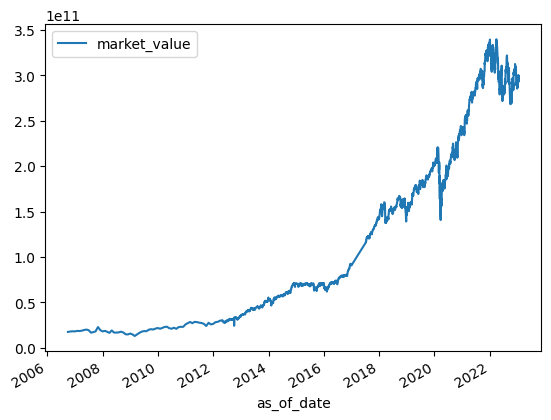

In [23]:
import pandas as pd
# ct.to_pandas().assign(as_of_date=lambda df: pd.to_datetime(df['as_of_date'])).set_index('as_of_date').plot()

mv.to_pandas().assign(as_of_date=lambda df: pd.to_datetime(df['as_of_date'])).set_index('as_of_date').plot()

<AxesSubplot: xlabel='as_of_date'>

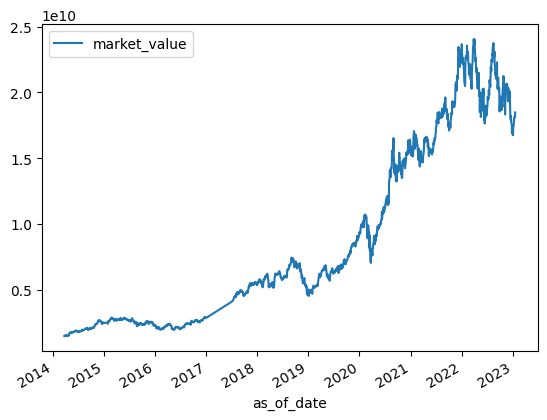

In [41]:
df.filter(pl.col("ticker")=="AAPL")[['as_of_date', 'market_value']].to_pandas().assign(as_of_date=lambda df: pd.to_datetime(df['as_of_date'])).set_index('as_of_date').plot()

In [1]:
from etf_scraper.main import scrape_holdings, SaveFormat

scrape_holdings(
        tickers=['IVV'],
        start_date="2022-01-01",
        end_date="2022-01-10",
        month_ends=False,
        trading_days=False,
        overwrite=False,
        save_dir="/tmp/f2",
        out_fmt="csv",
        num_threads=10,
    )


In [3]:
import pandas as pd
pd.read_parquet('/tmp/f2/IVV_2023_01_*.parquet')

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/f2/IVV_2023_01_*.parquet'